#1o passo: Importando o Pandas e lendo o arquivo csv

- atribuição da leitura a uma variavel "notas" 
- lendo as primeiras 5 informações

In [1]:
import pandas as pd 
notas = pd.read_csv('ratings.csv')

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


#2o agora vamos trocar os nomes das colunas para o português para melhor entendimento do dataframe

In [2]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


#3o Vamos ver o quanto as notas variam, isso é, do mínimo até o máximo

In [3]:
notas['nota'].unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#4o Para saber quantas vezes as notas aparecem

In [4]:
notas['nota'].value_counts()

4.0    11781
3.0     8533
5.0     6093
3.5     5408
4.5     4055
2.0     3085
2.5     1990
1.0     1131
1.5      535
0.5      473
Name: nota, dtype: int64

#5o Tirar a média das notas

In [5]:
notas['nota'].mean()

3.5669506081143814

#6o Plotando um gráfico



<Axes: >

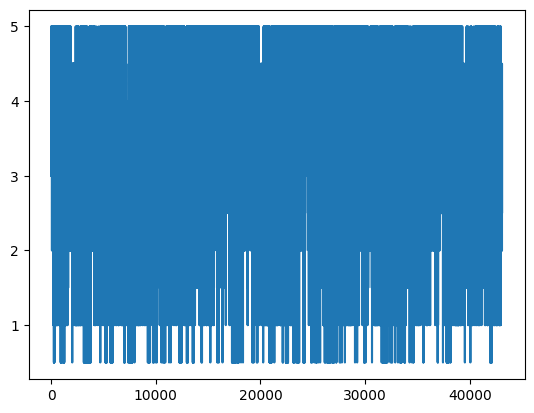

In [6]:
notas.nota.plot()

#7o Plotando um histograma um gráfico mais legivel 

<Axes: ylabel='Frequency'>

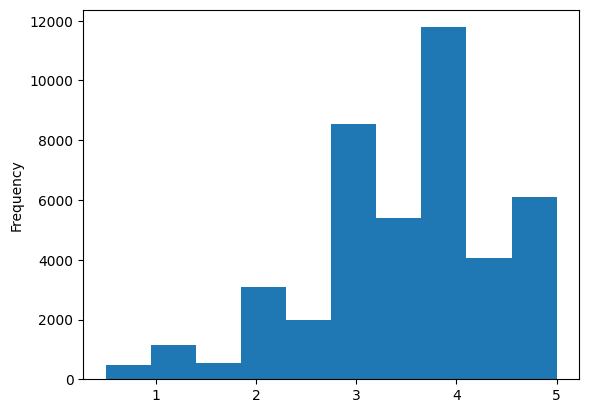

In [7]:
notas.nota.plot(kind = 'hist')

#8o Média e Mediana

In [8]:
print('Média:', notas['nota'].mean())
print('Mediana:', notas['nota'].median())

Média: 3.5669506081143814
Mediana: 4.0


#9o Função describe(), vai descrever nosso dataframe nos dando:

- count;
- mean;
- std;
- min;
- 25%;
- 50%;
- 75%;
- max.

In [9]:
notas.nota.describe()

count    43084.000000
mean         3.566951
std          1.022535
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

#10 Vamos plotar usando o Seaborn agora outra biblioteca python

- nela é possível plotar um gráfico chamdo bloxplot que nos mostra a mediana e os outliers

<Axes: >

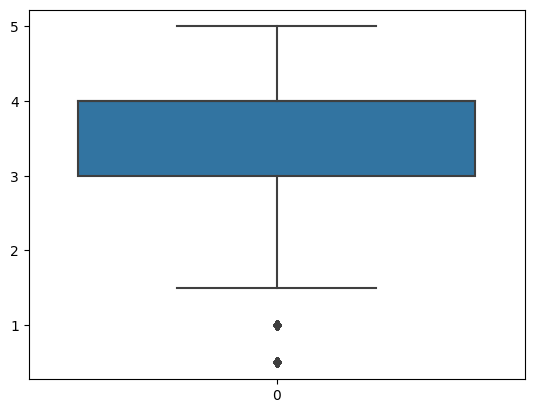

In [10]:
import seaborn as sns

sns.boxplot(notas.nota)

#11o Agora vamos trabalhar com outro dataframe e no futuro fazer um query entre o dataframe notas que já trabalhamos e esse novo

In [11]:
filmes = pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Novamente vamos mudar o nome das colunas para o português

In [12]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Vamos fazer nossa primeira Query

-

In [13]:
notas.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,9.649827e+08
516,5,1,4.0,8.474350e+08
874,7,1,4.5,1.106636e+09
1434,15,1,2.5,1.510578e+09
1667,17,1,4.5,1.305696e+09
...,...,...,...,...
41067,279,1,3.0,1.506394e+09
41243,280,1,4.5,1.348435e+09
41460,282,1,4.5,1.378496e+09
41697,283,1,3.0,9.012276e+08


#Agora uma query entre o dataframe movies.csv e ratings.csv com média das notas do filme 1

In [14]:
filme1 = notas.query('filmeId==1').nota
print(filme1)
print('A média de notas do filme 1 (Toy Story) é {}'.format(filme1.mean()))

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
41067    3.0
41243    4.5
41460    4.5
41697    3.0
42114    4.5
Name: nota, Length: 107, dtype: float64
A média de notas do filme 1 (Toy Story) é 3.897196261682243


#Seria muito dificil tirar a média de todos os filmes um por um. Por isso, vamos gerar um objeto pandas chamado DataFrameGroupBy e tirar a média

In [15]:
mediasPorFilme = notas.groupby('filmeId').mean()['nota']
mediasPorFilme.head()

filmeId
1    3.897196
2    3.366667
3    3.538462
4    2.600000
5    3.480000
Name: nota, dtype: float64

#E agora um histograma dessas médias

<Axes: ylabel='Frequency'>

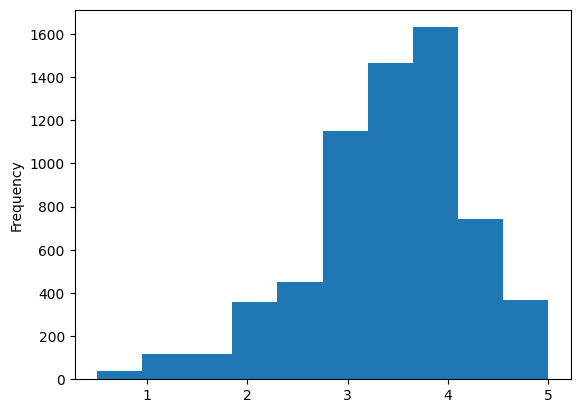

In [16]:
mediasPorFilme.plot(kind='hist')

In [ ]:
#sns.boxplot(mediasPorFilme)

In [17]:
mediasPorFilme.describe()

count    6433.000000
mean        3.436251
std         0.853154
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

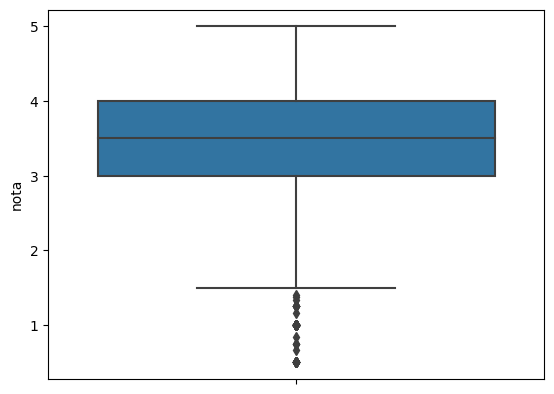

In [18]:
sns.boxplot(y=mediasPorFilme)

In [20]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)